# Day 1

https://live.skillbox.ru/code_int/online/071119/?utm_source=vk&utm_medium=messages&utm_campaign=all_all_vk_messages_invite_intensive-11-2019-10_all_code_skillbox&utm_content=2019-11-07&utm_term=intensive&ss_sub=5dc28978f20fba1e1b608967

In [1]:
import pandas as pd


In [17]:
exchange_rate = pd.read_csv('RC_F01_01_2016_T31_10_2019.csv', encoding='cp1251', delimiter = ';', decimal= ',')
exchange_rate.head()

,nominal,data,curs,cdx
0,1,01.01.2016,72.9299,Доллар США
1,1,12.01.2016,75.9507,Доллар США
2,1,13.01.2016,76.6041,Доллар США
3,1,14.01.2016,76.4275,Доллар США
4,1,15.01.2016,76.5230,Доллар США


In [18]:
def replaceCommaToDot(s):
    return float(s.replace(",", "."))

def replaceBad(s):
    return str(s).replace(".", ",")

In [21]:
exchange_rate['curs'].apply(replaceBad).apply(replaceCommaToDot)

0      72.9299
1      75.9507
2      76.6041
3      76.4275
4      76.5230
5      76.5650
6      78.6678
7      78.4862
8      79.4614
9      83.5913
10     80.5714
11     77.7965
12     81.8394
13     78.9969
14     77.3674
15     75.1723
16     76.3264
17     77.9273
18     79.2593
19     76.4609
20     77.3409
21     76.8614
22     78.6805
23     79.0689
24     79.1144
25     79.4951
26     77.7792
27     76.2450
28     77.8503
29     75.4575
        ...   
916    64.2199
917    63.8487
918    63.9453
919    63.7060
920    64.1873
921    64.2888
922    64.4156
923    64.6407
924    65.0670
925    65.4399
926    65.1312
927    65.0300
928    64.8259
929    64.8672
930    65.0976
931    64.7416
932    64.2237
933    64.3652
934    64.2548
935    64.3455
936    64.0144
937    63.9542
938    63.7606
939    63.6336
940    63.7997
941    63.8600
942    63.9966
943    63.8700
944    63.8320
945    63.8734
Name: curs, Length: 946, dtype: float64

In [20]:
exchange_rate.head()

,nominal,data,curs,cdx
0,1,01.01.2016,72.9299,Доллар США
1,1,12.01.2016,75.9507,Доллар США
2,1,13.01.2016,76.6041,Доллар США
3,1,14.01.2016,76.4275,Доллар США
4,1,15.01.2016,76.5230,Доллар США


In [22]:
exchange_rate.describe()

,nominal,curs
count,946.0,946.000000
mean,1.0,63.161218
std,0.0,4.674990
min,1.0,55.671700
25%,1.0,59.147925
50%,1.0,63.726300
75%,1.0,65.705600
max,1.0,83.591300


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

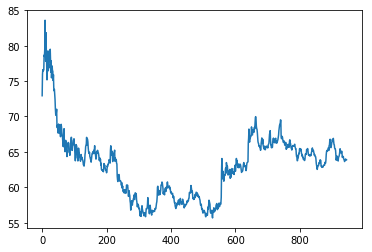

In [26]:
plt.plot(exchange_rate['curs'])

# Day 2

https://live.skillbox.ru/code_int/online/081119/?utm_source=vk&utm_medium=messages&utm_campaign=all_all_vk_messages_invite_intensive-11-2019-10_all_code_skillbox&utm_content=2019-11-08&utm_term=intensive&ss_sub=5dc28978f20fba1e1b608967


Этапы
- сбор данных
- преобразование  (ETL)
- обучение        (ML)
- предсказание   (?!)

### Регрессия
По набору факторов предсказываем конкретное значение
Возьмем данные за 28 дней назад и предсказать курс на 7 дней вперед


### Классификация
Определение принадлежности объекта к классу.
(определение класса в эл.почте, прогноз будет платить клиент или нет)


In [1]:
import pandas as pd
import sklearn 

In [2]:
money = pd.read_csv('RC_F01_01_2016_T31_10_2019.csv', encoding='cp1251', delimiter = ';', decimal= ',')
money.head()

,nominal,data,curs,cdx
0,1,01.01.2016,72.9299,Доллар США
1,1,12.01.2016,75.9507,Доллар США
2,1,13.01.2016,76.6041,Доллар США
3,1,14.01.2016,76.4275,Доллар США
4,1,15.01.2016,76.5230,Доллар США


In [3]:
values = money['curs']
values.head(2)

0    72.9299
1    75.9507
Name: curs, dtype: float64

In [4]:
# Задаются рамки для расчета скользящих показателей

start = 28
end = len(values) - 7

In [6]:
past = 28
future = 7

In [7]:
raw_df = []
for i in range(start, end):
    past_and_future_values = values[(i-past):(i+future)]   # [-28 ... +7]
    raw_df.append(list(past_and_future_values))

In [8]:
raw_df[:1]

[[72.929900000000004,
  75.950699999999998,
  76.604100000000003,
  76.427499999999995,
  76.522999999999996,
  76.564999999999998,
  78.6678,
  78.486199999999997,
  79.461399999999998,
  83.591300000000004,
  80.571399999999997,
  77.796499999999995,
  81.839399999999998,
  78.996899999999997,
  77.367400000000004,
  75.172300000000007,
  76.326400000000007,
  77.927300000000002,
  79.259299999999996,
  76.460899999999995,
  77.340900000000005,
  76.861400000000003,
  78.680499999999995,
  79.068899999999999,
  79.114400000000003,
  79.495099999999994,
  77.779200000000003,
  76.245000000000005,
  77.850300000000004,
  75.457499999999996,
  76.365700000000004,
  77.132599999999996,
  76.392799999999994,
  76.392899999999997,
  75.090299999999999]]

In [9]:
past_columns = [f"past_{i}" for i in range(past)]
future_columns = [f"future_{i}" for i in range(future)]
print(past_columns)
print(future_columns)

['past_0', 'past_1', 'past_2', 'past_3', 'past_4', 'past_5', 'past_6', 'past_7', 'past_8', 'past_9', 'past_10', 'past_11', 'past_12', 'past_13', 'past_14', 'past_15', 'past_16', 'past_17', 'past_18', 'past_19', 'past_20', 'past_21', 'past_22', 'past_23', 'past_24', 'past_25', 'past_26', 'past_27']
['future_0', 'future_1', 'future_2', 'future_3', 'future_4', 'future_5', 'future_6']


In [10]:
df = pd.DataFrame(raw_df, columns=(past_columns + future_columns))
df.head()

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,72.9299,75.9507,76.6041,76.4275,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,...,79.4951,77.7792,76.2450,77.8503,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903
1,75.9507,76.6041,76.4275,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,80.5714,...,77.7792,76.2450,77.8503,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903,75.8994
2,76.6041,76.4275,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,80.5714,77.7965,...,76.2450,77.8503,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903,75.8994,74.0536
3,76.4275,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,80.5714,77.7965,81.8394,...,77.8503,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903,75.8994,74.0536,73.6256
4,76.5230,76.5650,78.6678,78.4862,79.4614,83.5913,80.5714,77.7965,81.8394,78.9969,...,75.4575,76.3657,77.1326,76.3928,76.3929,75.0903,75.8994,74.0536,73.6256,73.8242


In [11]:
# Тренировочная выборка
# Последняя строчка исключается для последующей проверки
X =df[past_columns][:-1]  # Факторы
y = df[future_columns][:-1]    # То что мы собираемся предсказывать
# мультирегрессия - т.к. мы предсказываем сразу 7 значений

In [12]:
# Тестовая выборка "экзамен" 
X_test = df[past_columns][-1:]
y_test = df[future_columns][-1:]

In [13]:
# Регрессия - модель, которая пытается предсказать значения с помощью прямой линии

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

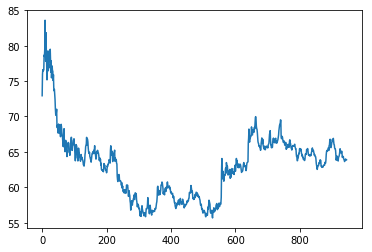

In [14]:
plt.plot(values)
plt.show()

In [15]:
LinReg = LinearRegression() # Настройки алгоритма

In [16]:
LinReg.fit(X, y)   # Обучение

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
prediction = LinReg.predict(X_test) # Предсказание

In [18]:
prediction[0]

array([ 63.90229154,  63.87462141,  63.84695883,  63.93915612,
        63.93692321,  63.95379212,  63.8847385 ])

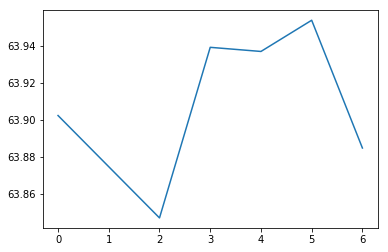

In [19]:
plt.plot(prediction[0])
plt.show()

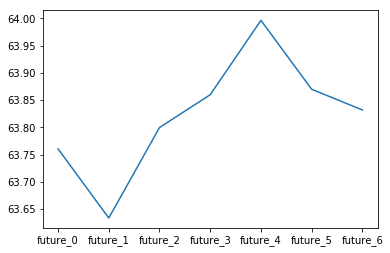

In [20]:
plt.plot(y_test.iloc[0])
plt.show()

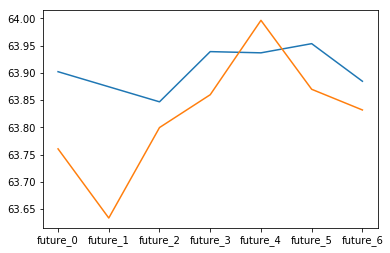

In [21]:
plt.plot(prediction[0], label="prediction")
plt.plot(y_test.iloc[0], label="real")
plt.show()

In [22]:
# средняя абсолютная ошибка
# Сумма отклонений деленая на количество точек
from sklearn.metrics import mean_absolute_error

In [23]:
# средняя абсолютная ошибка используется для оценки отклонения. 
# Чем меньше, тем лучше. Имеет физический смысл. В данном случае - 
# Среднее отклонение составило 10 копеек.
mean_absolute_error(y_test, prediction)

0.10076218757688744

In [24]:
# средняя квадратичная ошибка
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
# средняя квадратичная ошибка не подвержена влиянию 
# отрицательных чисел. 
mean_squared_error(y_test, prediction)

0.014290098695527113

In [26]:
# Multy Layer Perceptron
from sklearn.neural_network import MLPRegressor

In [27]:
MLP = MLPRegressor(max_iter = 400)

In [28]:
MLP

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [29]:
MLP.fit(X, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

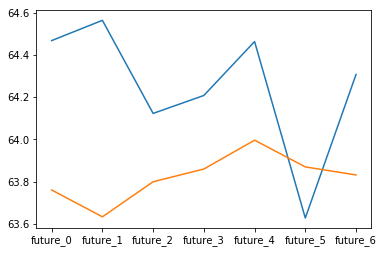

In [30]:
prediction = MLP.predict(X_test) # Предсказание
plt.plot(prediction[0], label = "prediction")
plt.plot(y_test.iloc[0], label = 'real')
plt.show()

In [31]:
print("mean_absolute_error", mean_absolute_error(y_test, prediction))
print("mean_squared_error", mean_squared_error(y_test, prediction))


mean_absolute_error 0.499460181667
mean_squared_error 0.299598993854


In [32]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
DTR = DecisionTreeRegressor(max_depth = 12)

In [48]:
DTR

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
DTR.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

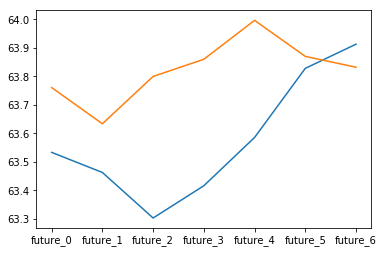

In [50]:
prediction = DTR.predict(X_test) # Предсказание
plt.plot(prediction[0], label = "prediction")
plt.plot(y_test.iloc[0], label = 'real')
plt.show()

Графики совпадают. Дело в том, что создалось достаточное большое дерево, в котором оказалась зашита вся выборка. Такие случаи называются переобучением.
Чтобы этого избежать для модели "Дерево решений" можно изменить параметр максимальной глубины дерева max_depth

In [46]:
print("mean_absolute_error", mean_absolute_error(y_test, prediction))
print("mean_squared_error", mean_squared_error(y_test, prediction))

mean_absolute_error 0.186282857143
mean_squared_error 0.0466569194857


Чтобы точно определить переобучилась наша модель или нет, нужно брать не одну тестовую выборку, а несколько.

In [ ]:
# Домашнее задаение
Использовать текущий csv файл
https://scikit-learn.org/stable/classes.html
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.l

1. Взять MLPRegressor, подобрать настройки и добиться точности лучше чем получилось в эфире
mean_absolute_error 0.499460181667
mean_squared_error 0.299598993854

2. Взять еще два алгоритма регрессии (***Regressor), и добиться высокой точности на них

3. Оформить iPython-ноутбук в виде отчета, с цифрами, графиками и сделать выводы.

Указывайте random_state, там где его можно указать

Не все модели поддерживают мультирегрессию

# Day 3

https://live.skillbox.ru/code_int/online/071119/?utm_source=vk&utm_medium=messages&utm_campaign=all_all_vk_messages_invite_marathon-8-2019-10_all_code_skillbox&utm_content=2019-11-09&utm_term=marathon&ss_sub=5dc28978f20fba1e1b608967

В прошлых моделях мы подбирали параметры вручную. Но этот процесс может быть автоматизирован.

Grid - Набор параметров, среди которых мы ищем оптимальные
Search - поиск
CV - cross validation (кросс-валидация). Это подход при котором во время обучения сразу идет и ее проверка. Допустим есть несколько примеров. Кросс-валидация часть массива данных использует для обучения, а часть для проверки, в сдующем проходе для обучения будет использована другая часть.
Кросс-валидация с тремя подходами (fold)
[ X X X X * * * * * * * *]
[ * * * * X X X X * * * *]
[ * * * * * * * * X X X X]

In [51]:
from sklearn.model_selection import GridSearchCV

In [53]:
# Генерация списков чисел
from numpy import linspace


In [55]:
# Задаются начало, конец и кол-во элементов
linspace(0, 500, 8)

array([   0.        ,   71.42857143,  142.85714286,  214.28571429,
        285.71428571,  357.14285714,  428.57142857,  500.        ])

In [62]:
# GridSearch

MLP2 = MLPRegressor()

# esitmator - объект модели.
# param_grid - сетка параметров, среди которых будем искать оптимальные

grid_search = GridSearchCV(MLP2, 
                           {
                            'activation': ['identity', 'logistic', 'tanh', 'relu'], 
                            'alpha': linspace(0.01, 0.000001, 5) , 
                            'hidden_layer_sizes': [(100, ), (50, 50, 50), (100, 50, 25)], 
                            'learning_rate': ['constant', 'invscaling', 'adaptive'],
                            'max_iter' : [20, 515, 1010, 1505, 2000]
                           }
                          )



In [63]:
grid_search.fit(X, y)

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWa

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1010) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWar

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarn

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1010) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1010) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1010) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, Convergenc

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWa

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarn

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWa

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarn

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarn

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1010) reached and the optimization hasn't converged yet.
  % self.max_iter, Convergence

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarn

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1010) reached and the optimization hasn't converged yet.
  % self.max_iter, Convergence

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWa

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1010) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1010) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1010) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, Convergenc

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dev\Anaconda32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'alpha': array([  1.00000e-02,   7.50025e-03,   5.00050e-03,   2.50075e-03,
         1.00000e-06]), 'hidden_layer_sizes': [(100,), (50, 50, 50), (100, 50, 25)], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'max_iter': [20, 515, 1010, 1505, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
# Выдача
GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'alpha': array([  1.00000e-02,   7.50025e-03,   5.00050e-03,   2.50075e-03,
         1.00000e-06]), 'hidden_layer_sizes': [(100,), (50, 50, 50), (100, 50, 25)], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'max_iter': [20, 515, 1010, 1505, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
# Получить лучшие параметры
grid_search.best_params_

{'activation': 'relu',
 'alpha': 9.9999999999999995e-07,
 'hidden_layer_sizes': (50, 50, 50),
 'learning_rate': 'adaptive',
 'max_iter': 515}

In [70]:
# Лучший результат
grid_search.best_score_

0.47805304135343524

In [71]:
# Номер лучше модели
grid_search.best_index_

881

In [73]:
# Здесь находится самая лучша обученая модель
grid_search.best_estimator_

MLPRegressor(activation='relu', alpha=9.9999999999999995e-07,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(50, 50, 50),
       learning_rate='adaptive', learning_rate_init=0.001, max_iter=515,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [76]:
# Предсказать
grid_search.best_estimator_.predict(X_test)

array([[ 64.35611435,  64.05682065,  64.31255339,  64.23319165,
         63.97108697,  64.20609504,  64.08630333]])

In [64]:
# Для того чтобы сохранить обученную модель можно использовать модуль pickle
import pickle

In [66]:
# Сохранение модели MLP в файл
pickle.dump(MLP, open("MLP_saved_model.pickle", "wb"))

In [67]:
# Загрузка из файла
MLP3 = pickle.load(open("MLP_saved_model.pickle", "rb"))

In [ ]:
Бибиотека H2O 
AutoML
В две строки кода подбирает модель, подбирает параметры, выбирает лучшие.
